In [107]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [108]:
work_folder="C:/Users/l/Desktop/CS760/hw4/languageID/"
file_name="e0.txt"
file_path=work_folder+file_name

with open(file_path,"r") as file:
    text=file.read().replace('\n','')

text

'our sun is in a more or less central region of the universe or a few hundred trillion miles from the actual centre the remainder of the stars which are all outside our solar system are spread out apparently in an enormous disclike collection so vast that even a ray of light which travels at the rate of  miles a second would take  years to travel from one end of it to the other this then is what we call our universethe astronomer has divided the sun into definite concentric regions or layers these layers envelop the nucleus or central body of the sun somewhat as the atmosphere envelops our earth it is through these vapour layers that the bright white body of the sun is seen of the innermost region the heart or nucleus of the sun we know almost nothing the central body or nucleus is surrounded by a brilliantly luminous envelope or layer of vaporous matter which is what we see when we look at the sun and which the astronomer calls the photospherethe sunwhat is its composition we know tha

In [109]:
X=np.array([])
Y=np.array([])
for y in ["e","j","s"]:
    for i in range(0,10):
        file_name=y+str(i)+".txt"
        file_path=work_folder+file_name
        
        with open(file_path,"r") as file:
            text=file.read().replace('\n','')
        Y=np.append(Y,y)
        X=np.append(X,text)

Y

array(['e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'j', 'j', 'j',
       'j', 'j', 'j', 'j', 'j', 'j', 'j', 's', 's', 's', 's', 's', 's',
       's', 's', 's', 's'], dtype='<U32')

In [110]:
def log_additive_smoothing(observation,total,type):
    return np.log((observation+1/2)/(total+1/2*type))

In [111]:
alphabet=[]
for a in range(97,97+26):
    alphabet.append(chr(a))
alphabet.append(' ')
alphabet

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 ' ']

In [112]:
# 1
# 0 english, 1 japanese, 2 spanish
language={0:"e",1:"j",2:"s"}
prior=np.array([0.0,0.0,0.0])
for i in [0,1,2]:
    prior[i]=log_additive_smoothing(sum(Y==language[i]),sum(Y!=0),3)
np.exp(prior)

array([0.33333333, 0.33333333, 0.33333333])

In [113]:
# 2 3
freq_matrix=np.zeros((3,27))
for y in range(0,3):
    index=np.where(Y==language[y])[0].tolist()
    text=""
    for i in index:
        text=text+X[i]
    freq=np.array([0]*27)
    for j in range(0,27):
        alpha=alphabet[j]
        freq_matrix[y,j]=text.count(alpha)
freq_matrix

class_conditional_prob=freq_matrix
for y in range(0,3):
    total=sum(class_conditional_prob[y])
    for j in range(0,27):
        class_conditional_prob[y,j]=log_additive_smoothing(class_conditional_prob[y,j],total,27)

np.exp(class_conditional_prob)


array([[6.01685115e-02, 1.11349744e-02, 2.15099950e-02, 2.19725756e-02,
        1.05369238e-01, 1.89327606e-02, 1.74789361e-02, 4.72162564e-02,
        5.54105402e-02, 1.42078308e-03, 3.73368578e-03, 2.89773666e-02,
        2.05187510e-02, 5.79216917e-02, 6.44639022e-02, 1.67520238e-02,
        5.61704940e-04, 5.38245498e-02, 6.61820585e-02, 8.01255576e-02,
        2.66644639e-02, 9.28465224e-03, 1.54964480e-02, 1.15645135e-03,
        1.38443747e-02, 6.27787874e-04, 1.79249959e-01],
       [1.31765610e-01, 1.08669066e-02, 5.48586603e-03, 1.72263182e-02,
        6.02047591e-02, 3.87854223e-03, 1.40116706e-02, 3.17621161e-02,
        9.70334393e-02, 2.34110207e-03, 5.74094133e-02, 1.43261470e-03,
        3.97987351e-02, 5.67105769e-02, 9.11632132e-02, 8.73545547e-04,
        1.04825466e-04, 4.28037318e-02, 4.21747790e-02, 5.69901115e-02,
        7.06174220e-02, 2.44592753e-04, 1.97421294e-02, 3.49418219e-05,
        1.41514379e-02, 7.72214263e-03, 1.23449457e-01],
       [1.04560451e-01

In [150]:
np.array([np.format_float_scientific(x, unique=True, precision=2) for x in np.exp(class_conditional_prob)[2]]).astype(float)


array([1.05e-01, 8.23e-03, 3.75e-02, 3.97e-02, 1.14e-01, 8.60e-03,
       7.18e-03, 4.53e-03, 4.99e-02, 6.63e-03, 2.78e-04, 5.29e-02,
       2.58e-02, 5.42e-02, 7.25e-02, 2.43e-02, 7.68e-03, 5.93e-02,
       6.58e-02, 3.56e-02, 3.37e-02, 5.89e-03, 9.25e-05, 2.50e-03,
       7.86e-03, 2.68e-03, 1.68e-01])

In [151]:
# 4
file_name="e10.txt"
file_path=work_folder+file_name

with open(file_path,"r") as file:
    text=file.read().replace('\n','')

bow=np.zeros(27)
for j in range(0,27):
        alpha=alphabet[j]
        bow[j]=text.count(alpha)

bow.astype(int)


array([164,  32,  53,  57, 311,  55,  51, 140, 140,   3,   6,  85,  64,
       139, 182,  53,   3, 141, 186, 225,  65,  31,  47,   4,  38,   2,
       498])

In [152]:
# 5
p_x_on_y=np.zeros(3)
for y in range(0,3):
    p_x_on_y[y]=np.dot(bow,class_conditional_prob[y])
p_x_on_y.round(2)

array([-7841.87, -8771.43, -8467.28])

In [116]:
# 6
p_x_and_y=prior+p_x_on_y
p_x_and_y


array([-7842.96405935, -8772.53169136, -8468.3806563 ])

In [117]:
#7

X_test=np.array([])
Y_test=np.array([])
for y in ["e","j","s"]:
    for i in range(10,20):
        file_name=y+str(i)+".txt"
        file_path=work_folder+file_name
        
        with open(file_path,"r") as file:
            text=file.read().replace('\n','')
        Y_test=np.append(Y_test,y)
        X_test=np.append(X_test,text)

X_test

array(['except when the winds rise to a high speed we seem to live in a very tranquil world at night when the glare of the sun passes out of our atmosphere the stars and planets seem to move across the heavens with a stately and solemn slowness it was one of the first discoveries of modern astronomy that this movement is only apparent the apparent creeping of the stars across the heavens at night is accounted for by the fact that the earth turns upon its axis once in every twentyfour hours when we remember the size of the earth we see that this implies a prodigious speedfig the milky wayit had remained unchanged since noon of the previous daya long low quietlooking cloud not very dense or brilliant or in any way remarkable except for its size at  pm the professor left the spectroscope for a short time and on returning half an hour later to his observations he was astonished to find the gigantic sun flame shattered to pieces the solar atmosphere was filled with flying debris and some of

In [118]:
bow=np.zeros((len(Y_test),27))
for i in range(0,len(X_test)):
        # print(i)
        text=X_test[i]
        for j in range(0,27):
                alpha=alphabet[j]
                bow[i][j]=X_test[i].count(alpha)

p_x_on_y=np.zeros((len(Y_test),3))
p_x_and_y=np.zeros((len(Y_test),3))
Y_pred=[]
for i in range(0,len(X_test)):
        for y in range(0,3):
            p_x_on_y[i][y]=np.dot(bow[i],class_conditional_prob[y])
            
        p_x_and_y[i]=prior+p_x_on_y[i]
        Y_pred.append(language[np.argmax(p_x_and_y[i])])
Y_pred==Y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [119]:
#Question 4 NN
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    sum=np.sum(np.exp(x))
    return np.exp(x)/sum

def sigmoid_derivative(x):
    a=sigmoid(x)
    return a*(1-a)

def softmax_derivative(x):
    a=softmax(x)
    return a*(1-a)

softmax_derivative(np.array([1,1,1]))
# softmax_derivative(

array([0.22222222, 0.22222222, 0.22222222])

In [120]:
# Forward pass
def forward(x):
    z1 = np.dot(W1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1)
    y_hat = softmax(z2)
    return z1, a1, z2, y_hat

# Cross-entropy loss
def cross_entropy(y, y_hat):
    return -np.sum(y * np.log(y_hat))

# Backpropagation
def backward(x, y, z1, a1, z2, y_hat):
    dz2 = y_hat - y
    dW2 = np.dot(dz2, a1.T)
    dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)
    dW1 = np.dot(dz1, x.T)
    return dW1, dW2

# Update weights
        # W1 -= learning_rate * dW1
        # W2 -= learning_rate * dW2


In [205]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
X = X / 255.0  # Normalize pixel values to [0, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0))
    return e_x / e_x.sum(axis=0)

# Cross-entropy loss function
def cross_entropy(y, y_hat):
    return -np.sum(y * np.log(y_hat))


c:\Users\l\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10, Loss: 37.2340
Epoch 2/10, Loss: 13.1494
Epoch 3/10, Loss: 10.7958
Epoch 4/10, Loss: 9.8072
Epoch 5/10, Loss: 9.1670
Epoch 6/10, Loss: 8.6580
Epoch 7/10, Loss: 8.2071
Epoch 8/10, Loss: 7.7890
Epoch 9/10, Loss: 7.3967
Epoch 10/10, Loss: 7.0296
Test Accuracy: 93.52%


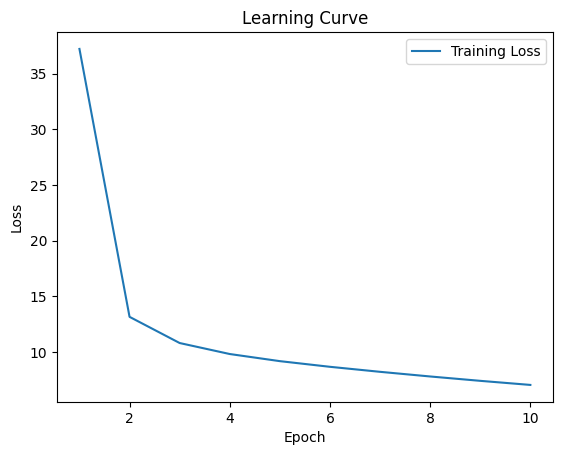

In [158]:
r_df=pd.DataFrame(columns=["d1",'learning_rate','num_epochs',"batch_size",'test_accuracy'])

for d1 in [200]:
    for learning_rate in [0.05]:
        for num_epochs in [10]:
            for batch_size in [32]:
                # Define the neural network architecture
                d = X_train.shape[1]  # Input dimension
                k = 10  # Output dimension (number of classes)
                # d1 = 300  # Hidden layer size

                # learning_rate = 0.01
                # num_epochs = 10
                # batch_size = 64


                # Initialize weights
                W1 = np.random.randn(d1, d) * 0.01
                W2 = np.random.randn(k, d1) * 0.01
                # Training loop
                train_losses = []
                for epoch in range(num_epochs):
                    total_loss = 0
                    for i in range(0, len(X_train), batch_size):
                        # Get a batch of data
                        X_batch = X_train[i:i+batch_size]
                        y_batch = y_train[i:i+batch_size]

                        # One-hot encoding of labels
                        y_batch_onehot = np.zeros((k, len(y_batch)))
                        for idx, label in enumerate(y_batch):
                            y_batch_onehot[int(label), idx] = 1

                        # Forward pass
                        z1 = np.dot(W1, X_batch.T)
                        a1 = 1 / (1 + np.exp(-z1))
                        z2 = np.dot(W2, a1)
                        y_hat = softmax(z2)

                        # Compute loss
                        loss = cross_entropy(y_batch_onehot, y_hat)

                        total_loss += loss

                        # Backpropagation
                        dz2 = y_hat - y_batch_onehot
                        dW2 = np.dot(dz2, a1.T) / batch_size
                        dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)
                        dW1 = np.dot(dz1, X_batch) / batch_size

                        # Update weights
                        W1 -= learning_rate * dW1
                        W2 -= learning_rate * dW2

                    # Average loss for this epoch
                    avg_loss = total_loss / (len(X_train) // batch_size)
                    train_losses.append(avg_loss)
                    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

                    
                # Test the model
                test_losses = []
                correct = 0
                for i in range(0, len(X_test), batch_size):
                    X_batch = X_test[i:i+batch_size]
                    y_batch = y_test[i:i+batch_size]

                    y_batch_onehot = np.zeros((k, len(y_batch)))
                    for idx, label in enumerate(y_batch):
                        y_batch_onehot[int(label), idx] = 1

                    z1 = np.dot(W1, X_batch.T)
                    a1 = 1 / (1 + np.exp(-z1))
                    z2 = np.dot(W2, a1)
                    y_hat = softmax(z2)

                    loss = cross_entropy(y_batch_onehot, y_hat)
                    test_losses.append(loss)

                    # Calculate the number of correct predictions
                    predictions = np.argmax(y_hat, axis=0)
                    correct += np.sum(predictions == y_batch.astype(int))

                # Calculate the test accuracy
                test_accuracy = correct / len(X_test)
                print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
                
                r_df.loc[len(r_df)]=[d1,learning_rate,num_epochs,batch_size,test_accuracy]
                # Plot learning curve
                plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title('Learning Curve')
                plt.legend()
                plt.show()




In [155]:
print(r_df.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & d1 & learning_rate & num_epochs & batch_size & test_accuracy \\
\midrule
0 & 200.000000 & 0.010000 & 10.000000 & 32.000000 & 0.899786 \\
1 & 200.000000 & 0.010000 & 10.000000 & 64.000000 & 0.870500 \\
2 & 200.000000 & 0.010000 & 20.000000 & 32.000000 & 0.915357 \\
3 & 200.000000 & 0.010000 & 20.000000 & 64.000000 & 0.899000 \\
4 & 200.000000 & 0.050000 & 10.000000 & 32.000000 & 0.935429 \\
5 & 200.000000 & 0.050000 & 10.000000 & 64.000000 & 0.919286 \\
6 & 200.000000 & 0.050000 & 20.000000 & 32.000000 & 0.954714 \\
7 & 200.000000 & 0.050000 & 20.000000 & 64.000000 & 0.936214 \\
8 & 200.000000 & 0.100000 & 10.000000 & 32.000000 & 0.952929 \\
9 & 200.000000 & 0.100000 & 10.000000 & 64.000000 & 0.936071 \\
10 & 200.000000 & 0.100000 & 20.000000 & 32.000000 & 0.967214 \\
11 & 200.000000 & 0.100000 & 20.000000 & 64.000000 & 0.955357 \\
12 & 300.000000 & 0.010000 & 10.000000 & 32.000000 & 0.900714 \\
13 & 300.000000 & 0.010000 & 10.000000 & 64.000000 & 0.8

In [137]:
# Test the model
test_losses = []
correct = 0
for i in range(0, len(X_test), batch_size):
    X_batch = X_test[i:i+batch_size]
    y_batch = y_test[i:i+batch_size]

    y_batch_onehot = np.zeros((k, len(y_batch)))
    for idx, label in enumerate(y_batch):
        y_batch_onehot[int(label), idx] = 1

    z1 = np.dot(W1, X_batch.T)
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(W2, a1)
    y_hat = softmax(z2)

    loss = cross_entropy(y_batch_onehot, y_hat)
    test_losses.append(loss)

    # Calculate the number of correct predictions
    predictions = np.argmax(y_hat, axis=0)
    correct += np.sum(predictions == y_batch.astype(int))

# Calculate the test accuracy
test_accuracy = correct / len(X_test)

test_accuracy

0.8977142857142857

In [199]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torch.nn.init as init

# # Load the MNIST 784 dataset
# mnist = fetch_openml("mnist_784")
# X, y = mnist.data / 255.0, mnist.target.astype(int)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return torch.softmax(x, dim=1)



In [194]:
import torch.nn.init as init


In [197]:
X_train = torch.from_numpy(X_train.numpy()).float()
y_train = torch.from_numpy(y_train.numpy()).long()
X_test = torch.from_numpy(X_test.numpy()).float()
y_test = torch.from_numpy(y_test.numpy()).long()



Test Accuracy: 80.48%
      d1  learning_rate  num_epochs  batch_size  test_accuracy
0  200.0           0.05        10.0        32.0      80.478571


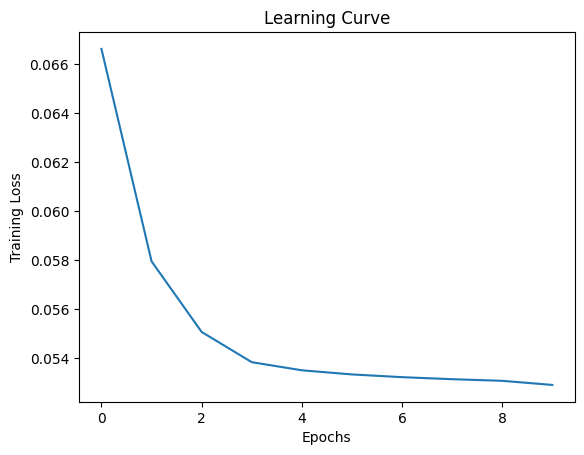

Test Accuracy: 84.04%
      d1  learning_rate  num_epochs  batch_size  test_accuracy
0  200.0           0.05        10.0        32.0      80.478571
1  200.0           0.10        10.0        32.0      84.035714


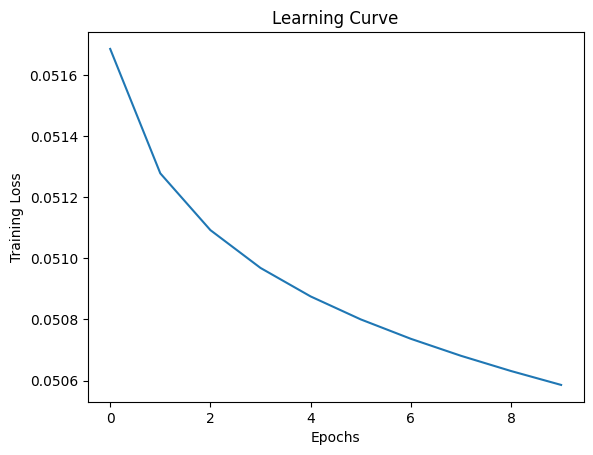

Test Accuracy: 84.49%
      d1  learning_rate  num_epochs  batch_size  test_accuracy
0  200.0           0.05        10.0        32.0      80.478571
1  200.0           0.10        10.0        32.0      84.035714
2  200.0           0.05        10.0        64.0      84.485714


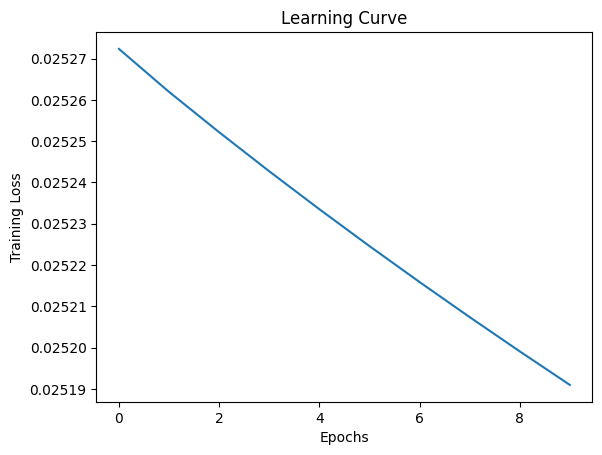

Test Accuracy: 84.95%
      d1  learning_rate  num_epochs  batch_size  test_accuracy
0  200.0           0.05        10.0        32.0      80.478571
1  200.0           0.10        10.0        32.0      84.035714
2  200.0           0.05        10.0        64.0      84.485714
3  200.0           0.10        10.0        64.0      84.950000


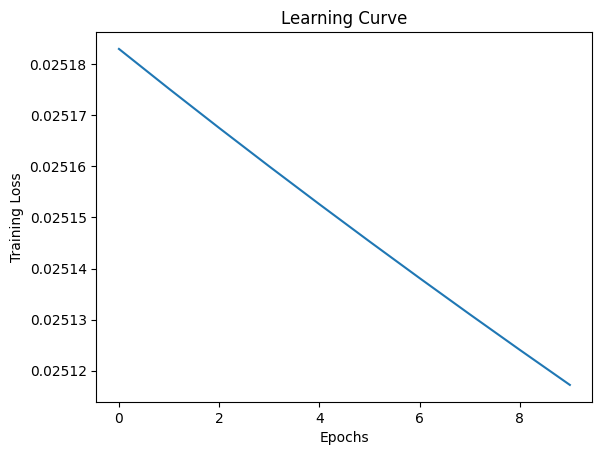

Test Accuracy: 85.92%
      d1  learning_rate  num_epochs  batch_size  test_accuracy
0  200.0           0.05        10.0        32.0      80.478571
1  200.0           0.10        10.0        32.0      84.035714
2  200.0           0.05        10.0        64.0      84.485714
3  200.0           0.10        10.0        64.0      84.950000
4  200.0           0.05        20.0        32.0      85.921429


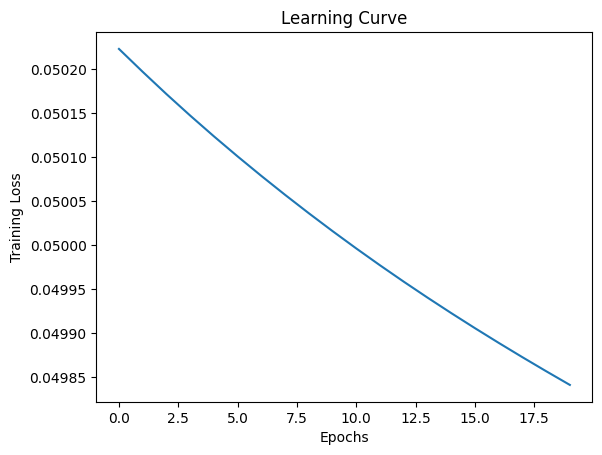

KeyboardInterrupt: 

In [202]:
# Hyperparameters
input_size = 784
hidden_size = 200
output_size = 10
num_epochs = 10
batch_size = 64
learning_rate = 0.1

# Create the model and optimizer
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

r_df=pd.DataFrame(columns=["d1",'learning_rate','num_epochs',"batch_size",'test_accuracy'])

for hidden_size in [200]:
    for num_epochs in [10,20]:
        for batch_size in [32,64]:
            for learning_rate in [0.05,0.1]:
                # Training loop:
                losses = []

                for epoch in range(num_epochs):
                    total_loss = 0.0

                    for i in range(0, len(X_train), batch_size):
                        inputs = X_train[i:i+batch_size]
                        labels = y_train[i:i+batch_size]

                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()
                        total_loss += loss.item()

                    losses.append(total_loss / len(X_train))

                # Test the model
                with torch.no_grad():
                    outputs = model(X_test)
                    _, predicted = torch.max(outputs, 1)
                    correct = (predicted == y_test).sum().item()
                    accuracy = correct / len(X_test) * 100

                print(f'Test Accuracy: {accuracy:.2f}%')
                
                r_df.loc[len(r_df)]=[d1,learning_rate,num_epochs,batch_size,accuracy]
                print(r_df)
                # Plot the learning curve
                plt.plot(range(num_epochs), losses)
                plt.xlabel("Epochs")
                plt.ylabel("Training Loss")
                plt.title("Learning Curve")
                plt.show()

Test Accuracy: 84.58%
       d1  learning_rate  num_epochs  batch_size  test_accuracy
0   200.0           0.05        10.0        32.0      81.507143
1   200.0           0.10        10.0        32.0      82.150000
2   200.0           0.05        10.0        64.0      82.342857
3   200.0           0.10        10.0        64.0      82.500000
4   200.0           0.05        20.0        32.0      83.121429
5   200.0           0.10        20.0        32.0      83.392857
6   200.0           0.05        20.0        64.0      83.492857
7   200.0           0.10        20.0        64.0      83.585714
8   200.0           0.05        10.0        32.0      83.671429
9   200.0           0.10        10.0        32.0      83.771429
10  200.0           0.05        10.0        64.0      83.842857
11  200.0           0.10        10.0        64.0      83.842857
12  200.0           0.05        20.0        32.0      84.042857
13  200.0           0.10        20.0        32.0      84.271429
14  200.0         

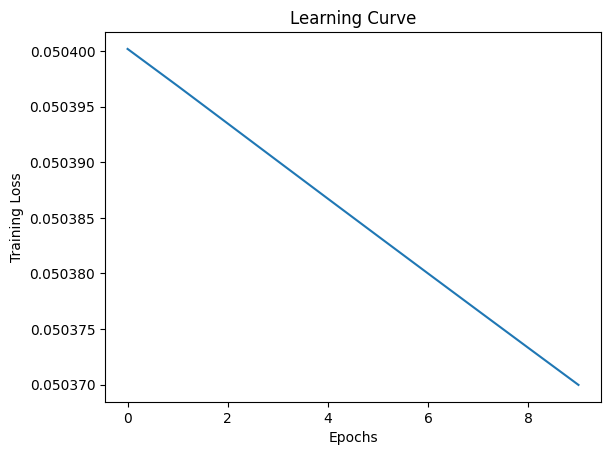

Test Accuracy: 84.61%
       d1  learning_rate  num_epochs  batch_size  test_accuracy
0   200.0           0.05        10.0        32.0      81.507143
1   200.0           0.10        10.0        32.0      82.150000
2   200.0           0.05        10.0        64.0      82.342857
3   200.0           0.10        10.0        64.0      82.500000
4   200.0           0.05        20.0        32.0      83.121429
5   200.0           0.10        20.0        32.0      83.392857
6   200.0           0.05        20.0        64.0      83.492857
7   200.0           0.10        20.0        64.0      83.585714
8   200.0           0.05        10.0        32.0      83.671429
9   200.0           0.10        10.0        32.0      83.771429
10  200.0           0.05        10.0        64.0      83.842857
11  200.0           0.10        10.0        64.0      83.842857
12  200.0           0.05        20.0        32.0      84.042857
13  200.0           0.10        20.0        32.0      84.271429
14  200.0         

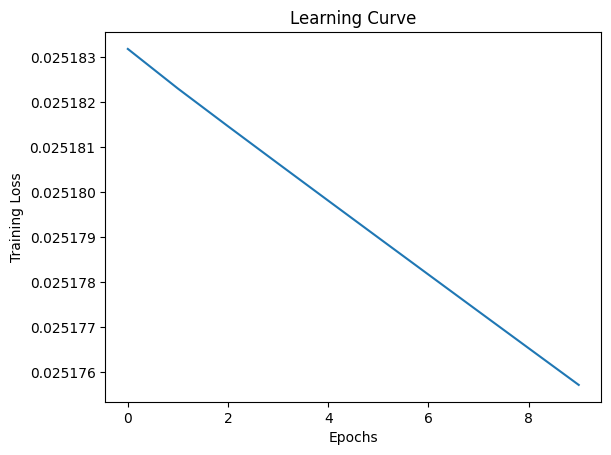

Test Accuracy: 84.73%
       d1  learning_rate  num_epochs  batch_size  test_accuracy
0   200.0           0.05        10.0        32.0      81.507143
1   200.0           0.10        10.0        32.0      82.150000
2   200.0           0.05        10.0        64.0      82.342857
3   200.0           0.10        10.0        64.0      82.500000
4   200.0           0.05        20.0        32.0      83.121429
5   200.0           0.10        20.0        32.0      83.392857
6   200.0           0.05        20.0        64.0      83.492857
7   200.0           0.10        20.0        64.0      83.585714
8   200.0           0.05        10.0        32.0      83.671429
9   200.0           0.10        10.0        32.0      83.771429
10  200.0           0.05        10.0        64.0      83.842857
11  200.0           0.10        10.0        64.0      83.842857
12  200.0           0.05        20.0        32.0      84.042857
13  200.0           0.10        20.0        32.0      84.271429
14  200.0         

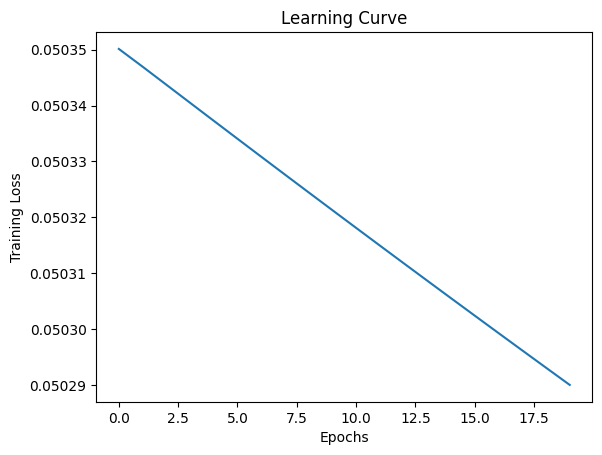

Test Accuracy: 84.82%
       d1  learning_rate  num_epochs  batch_size  test_accuracy
0   200.0           0.05        10.0        32.0      81.507143
1   200.0           0.10        10.0        32.0      82.150000
2   200.0           0.05        10.0        64.0      82.342857
3   200.0           0.10        10.0        64.0      82.500000
4   200.0           0.05        20.0        32.0      83.121429
5   200.0           0.10        20.0        32.0      83.392857
6   200.0           0.05        20.0        64.0      83.492857
7   200.0           0.10        20.0        64.0      83.585714
8   200.0           0.05        10.0        32.0      83.671429
9   200.0           0.10        10.0        32.0      83.771429
10  200.0           0.05        10.0        64.0      83.842857
11  200.0           0.10        10.0        64.0      83.842857
12  200.0           0.05        20.0        32.0      84.042857
13  200.0           0.10        20.0        32.0      84.271429
14  200.0         

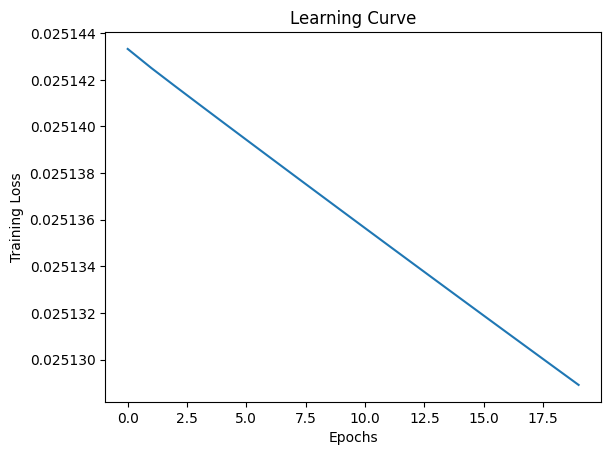

Test Accuracy: 84.93%
       d1  learning_rate  num_epochs  batch_size  test_accuracy
0   200.0           0.05        10.0        32.0      81.507143
1   200.0           0.10        10.0        32.0      82.150000
2   200.0           0.05        10.0        64.0      82.342857
3   200.0           0.10        10.0        64.0      82.500000
4   200.0           0.05        20.0        32.0      83.121429
5   200.0           0.10        20.0        32.0      83.392857
6   200.0           0.05        20.0        64.0      83.492857
7   200.0           0.10        20.0        64.0      83.585714
8   200.0           0.05        10.0        32.0      83.671429
9   200.0           0.10        10.0        32.0      83.771429
10  200.0           0.05        10.0        64.0      83.842857
11  200.0           0.10        10.0        64.0      83.842857
12  200.0           0.05        20.0        32.0      84.042857
13  200.0           0.10        20.0        32.0      84.271429
14  200.0         

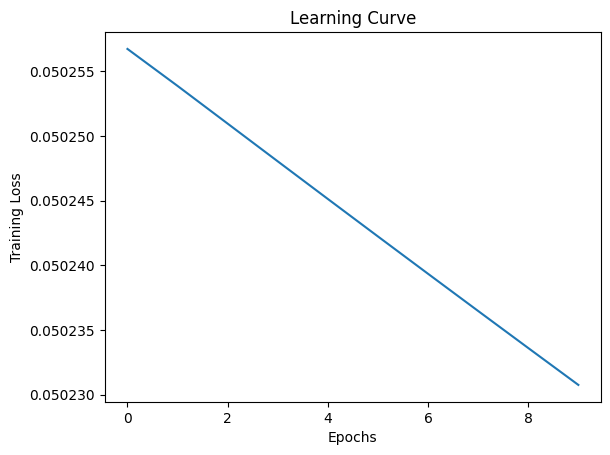

Test Accuracy: 85.00%
       d1  learning_rate  num_epochs  batch_size  test_accuracy
0   200.0           0.05        10.0        32.0      81.507143
1   200.0           0.10        10.0        32.0      82.150000
2   200.0           0.05        10.0        64.0      82.342857
3   200.0           0.10        10.0        64.0      82.500000
4   200.0           0.05        20.0        32.0      83.121429
5   200.0           0.10        20.0        32.0      83.392857
6   200.0           0.05        20.0        64.0      83.492857
7   200.0           0.10        20.0        64.0      83.585714
8   200.0           0.05        10.0        32.0      83.671429
9   200.0           0.10        10.0        32.0      83.771429
10  200.0           0.05        10.0        64.0      83.842857
11  200.0           0.10        10.0        64.0      83.842857
12  200.0           0.05        20.0        32.0      84.042857
13  200.0           0.10        20.0        32.0      84.271429
14  200.0         

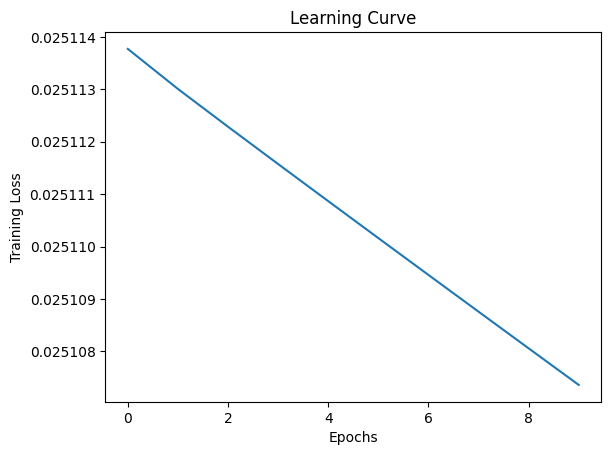

KeyboardInterrupt: 

In [185]:
# Hyperparameters
input_size = 784
hidden_size = 200
output_size = 10
num_epochs = 10
batch_size = 64
learning_rate = 0.1

# r_df=pd.DataFrame(columns=["d1",'learning_rate','num_epochs',"batch_size",'test_accuracy'])

for hidden_size in [100,200]:
    for num_epochs in [10,20]:
        for batch_size in [32,64]:
            for learning_rate in [0.01]:
                # Training loop:
                losses = []

                for epoch in range(num_epochs):
                    total_loss = 0.0

                    for i in range(0, len(X_train), batch_size):
                        inputs = X_train[i:i+batch_size]
                        labels = y_train[i:i+batch_size]

                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()
                        total_loss += loss.item()

                    losses.append(total_loss / len(X_train))

                # Test the model
                with torch.no_grad():
                    outputs = model(X_test)
                    _, predicted = torch.max(outputs, 1)
                    correct = (predicted == y_test).sum().item()
                    accuracy = correct / len(X_test) * 100

                print(f'Test Accuracy: {accuracy:.2f}%')
                
                r_df.loc[len(r_df)]=[d1,learning_rate,num_epochs,batch_size,accuracy]
                print(r_df)
                # Plot the learning curve
                plt.plot(range(num_epochs), losses)
                plt.xlabel("Epochs")
                plt.ylabel("Training Loss")
                plt.title("Learning Curve")
                plt.show()

In [186]:
r_df

,d1,learning_rate,num_epochs,batch_size,test_accuracy
0,200.0,0.05,10.0,32.0,81.507143
1,200.0,0.10,10.0,32.0,82.150000
2,200.0,0.05,10.0,64.0,82.342857
3,200.0,0.10,10.0,64.0,82.500000
4,200.0,0.05,20.0,32.0,83.121429
5,200.0,0.10,20.0,32.0,83.392857
6,200.0,0.05,20.0,64.0,83.492857
7,200.0,0.10,20.0,64.0,83.585714
8,200.0,0.05,10.0,32.0,83.671429
9,200.0,0.10,10.0,32.0,83.771429


Epoch 1/10, Loss: 37.3335
Epoch 2/10, Loss: 13.1832
Epoch 3/10, Loss: 10.8004
Epoch 4/10, Loss: 9.8068
Epoch 5/10, Loss: 9.1609
Epoch 6/10, Loss: 8.6445
Epoch 7/10, Loss: 8.1855
Epoch 8/10, Loss: 7.7599
Epoch 9/10, Loss: 7.3621
Epoch 10/10, Loss: 6.9918
Test Accuracy: 93.65%


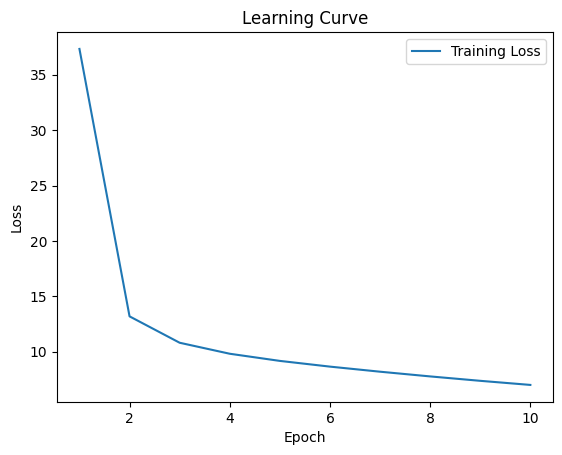

In [206]:
r_df=pd.DataFrame(columns=["d1",'learning_rate','num_epochs',"batch_size",'test_accuracy'])

for d1 in [200]:
    for learning_rate in [0.05]:
        for num_epochs in [10]:
            for batch_size in [32]:
                # Define the neural network architecture
                d = X_train.shape[1]  # Input dimension
                k = 10  # Output dimension (number of classes)
                # d1 = 300  # Hidden layer size

                # learning_rate = 0.01
                # num_epochs = 10
                # batch_size = 64


                # Initialize weights
                W1 = np.random.randn(d1, d) * 0.01
                W2 = np.random.randn(k, d1) * 0.01
                # Training loop
                train_losses = []
                for epoch in range(num_epochs):
                    total_loss = 0
                    for i in range(0, len(X_train), batch_size):
                        # Get a batch of data
                        X_batch = X_train[i:i+batch_size]
                        y_batch = y_train[i:i+batch_size]

                        # One-hot encoding of labels
                        y_batch_onehot = np.zeros((k, len(y_batch)))
                        for idx, label in enumerate(y_batch):
                            y_batch_onehot[int(label), idx] = 1

                        # Forward pass
                        z1 = np.dot(W1, X_batch.T)
                        a1 = 1 / (1 + np.exp(-z1))
                        z2 = np.dot(W2, a1)
                        y_hat = softmax(z2)

                        # Compute loss
                        loss = cross_entropy(y_batch_onehot, y_hat)

                        total_loss += loss

                        # Backpropagation
                        dz2 = y_hat - y_batch_onehot
                        dW2 = np.dot(dz2, a1.T) / batch_size
                        dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)
                        dW1 = np.dot(dz1, X_batch) / batch_size

                        # Update weights
                        W1 -= learning_rate * dW1
                        W2 -= learning_rate * dW2

                    # Average loss for this epoch
                    avg_loss = total_loss / (len(X_train) // batch_size)
                    train_losses.append(avg_loss)
                    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

                    
                # Test the model
                test_losses = []
                correct = 0
                for i in range(0, len(X_test), batch_size):
                    X_batch = X_test[i:i+batch_size]
                    y_batch = y_test[i:i+batch_size]

                    y_batch_onehot = np.zeros((k, len(y_batch)))
                    for idx, label in enumerate(y_batch):
                        y_batch_onehot[int(label), idx] = 1

                    z1 = np.dot(W1, X_batch.T)
                    a1 = 1 / (1 + np.exp(-z1))
                    z2 = np.dot(W2, a1)
                    y_hat = softmax(z2)

                    loss = cross_entropy(y_batch_onehot, y_hat)
                    test_losses.append(loss)

                    # Calculate the number of correct predictions
                    predictions = np.argmax(y_hat, axis=0)
                    correct += np.sum(predictions == y_batch.astype(int))

                # Calculate the test accuracy
                test_accuracy = correct / len(X_test)
                print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
                
                r_df.loc[len(r_df)]=[d1,learning_rate,num_epochs,batch_size,test_accuracy]
                # Plot learning curve
                plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title('Learning Curve')
                plt.legend()
                plt.show()




Epoch 1/10, Loss: 74.1334
Epoch 2/10, Loss: 73.7706
Epoch 3/10, Loss: 73.0039
Epoch 4/10, Loss: 71.4135
Epoch 5/10, Loss: 69.7066
Epoch 6/10, Loss: 68.5804
Epoch 7/10, Loss: 67.8925
Epoch 8/10, Loss: 67.4412
Epoch 9/10, Loss: 67.1206
Epoch 10/10, Loss: 66.8774
Test Accuracy: 11.43%


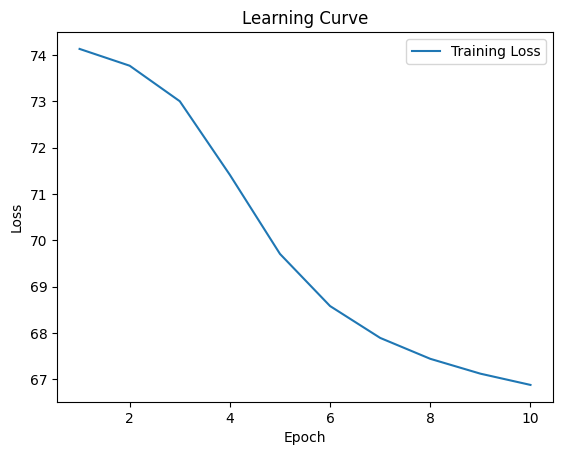

In [212]:
r_df=pd.DataFrame(columns=["d1",'learning_rate','num_epochs',"batch_size",'test_accuracy'])

# weight initiate to 0
for d1 in [200]:
    for learning_rate in [0.05]:
        for num_epochs in [10]:
            for batch_size in [32]:
                # Define the neural network architecture
                d = X_train.shape[1]  # Input dimension
                k = 10  # Output dimension (number of classes)
                # d1 = 300  # Hidden layer size

                # learning_rate = 0.01
                # num_epochs = 10
                # batch_size = 64


                # Initialize weights
                W1 = np.zeros((d1,d)) * 0.01
                W2 = np.zeros((k,d1)) * 0.01
                # Training loop
                train_losses = []
                for epoch in range(num_epochs):
                    total_loss = 0
                    for i in range(0, len(X_train), batch_size):
                        # Get a batch of data
                        X_batch = X_train[i:i+batch_size]
                        y_batch = y_train[i:i+batch_size]

                        # One-hot encoding of labels
                        y_batch_onehot = np.zeros((k, len(y_batch)))
                        for idx, label in enumerate(y_batch):
                            y_batch_onehot[int(label), idx] = 1

                        # Forward pass
                        z1 = np.dot(W1, X_batch.T)
                        a1 = 1 / (1 + np.exp(-z1))
                        z2 = np.dot(W2, a1)
                        y_hat = softmax(z2)

                        # Compute loss
                        loss = cross_entropy(y_batch_onehot, y_hat)

                        total_loss += loss

                        # Backpropagation
                        dz2 = y_hat - y_batch_onehot
                        dW2 = np.dot(dz2, a1.T) / batch_size
                        dz1 = np.dot(W2.T, dz2) * a1 * (1 - a1)
                        dW1 = np.dot(dz1, X_batch) / batch_size

                        # Update weights
                        W1 -= learning_rate * dW1
                        W2 -= learning_rate * dW2

                    # Average loss for this epoch
                    avg_loss = total_loss / (len(X_train) // batch_size)
                    train_losses.append(avg_loss)
                    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

                    
                # Test the model
                test_losses = []
                correct = 0
                for i in range(0, len(X_test), batch_size):
                    X_batch = X_test[i:i+batch_size]
                    y_batch = y_test[i:i+batch_size]

                    y_batch_onehot = np.zeros((k, len(y_batch)))
                    for idx, label in enumerate(y_batch):
                        y_batch_onehot[int(label), idx] = 1

                    z1 = np.dot(W1, X_batch.T)
                    a1 = 1 / (1 + np.exp(-z1))
                    z2 = np.dot(W2, a1)
                    y_hat = softmax(z2)

                    loss = cross_entropy(y_batch_onehot, y_hat)
                    test_losses.append(loss)

                    # Calculate the number of correct predictions
                    predictions = np.argmax(y_hat, axis=0)
                    correct += np.sum(predictions == y_batch.astype(int))

                # Calculate the test accuracy
                test_accuracy = correct / len(X_test)
                print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
                
                r_df.loc[len(r_df)]=[d1,learning_rate,num_epochs,batch_size,test_accuracy]
                # Plot learning curve
                plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.title('Learning Curve')
                plt.legend()
                plt.show()




In [210]:
d

784